In [1]:
from symbulate import *
%matplotlib inline

((636.093302508, 596.285645399),
 (84.8963141572, 70.3552654152),
 0.6061944175042463)

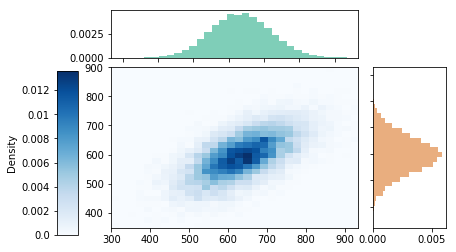

In [2]:
Z1, Z2 = RV(Normal(0, 1) ** 2)
X = 635 + 85 * Z1
Y = 595 + 0.6 * 70 * Z1 + sqrt(1 - 0.6 ** 2) * 70 * Z2

xy = (X & Y).sim(10000)
xy.plot(['hist', 'marginal'])
xy.mean(), xy.sd(), xy.corr()

In [46]:
M, R = RV(BivariateNormal(mean1=635, mean2=595, sd1=85, sd2=70, corr=0.6))

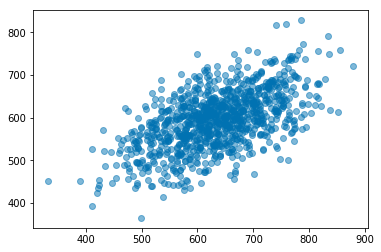

In [4]:
(M & R).sim(1000).plot()

In [42]:
1-Normal(0,1).cdf(0.765)

0.22213577231232384

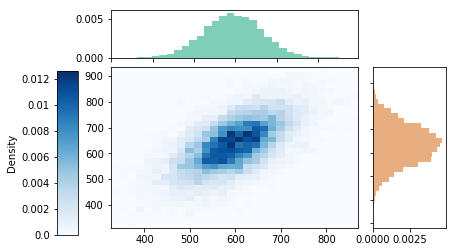

In [47]:
(R & M).sim(10000).plot(['hist', 'marginal'])

0.2228

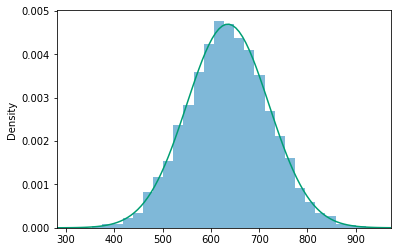

In [6]:
m = M.sim(10000)
m.plot()
Normal(635, 85).plot()
m.count_gt(700) / 10000

In [49]:
(700-595)/70*.6*85+635

711.5

In [50]:
85*sqrt(1-.6**2)

68.0

(1230.266284095294, 136.89794973792675, 0.0239)

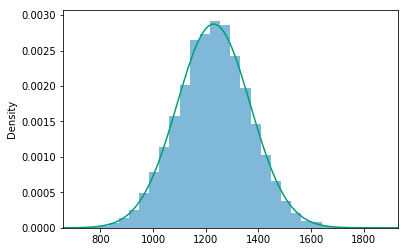

In [7]:
s = (M + R).sim(10000)
s.plot()
Normal(635+595, var=85**2 + 70**2 +2*0.6*85*70).plot()
s.mean(), s.sd(), s.count_gt(1500) / 10000

In [44]:
sqrt(85**2 + 70**2 +2*0.6*85*70)

138.7984149765407

In [45]:
(1500-1230)/139

1.9424460431654675

In [8]:
85*sqrt(1-0.6**2)

68.0

(711.263543710562, 67.63151212226701, 0.5625)

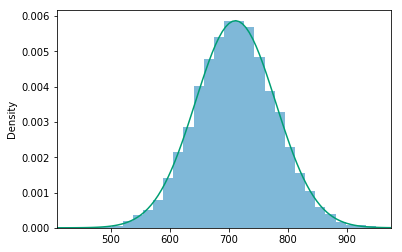

In [9]:
m_given_R_eq_700 = (M | (abs(R - 700) < 5) ).sim(10000)
m_given_R_eq_700.plot()
Normal(635+0.6*85*(700-595)/70, 85*sqrt(1-0.6**2)).plot()
m_given_R_eq_700.mean(), m_given_R_eq_700.sd(), m_given_R_eq_700.count_gt(700) / 10000

(40.60151969609768, 71.56671069840328, 0.7174)

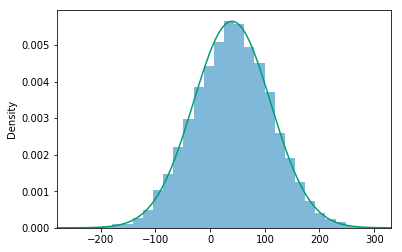

In [10]:
d = (M - R).sim(10000)
d.plot()
Normal(635-595, var=85**2 + 70**2 -2*0.6*85*70).plot()
d.mean(), d.sd(), d.count_gt(0) / 10000

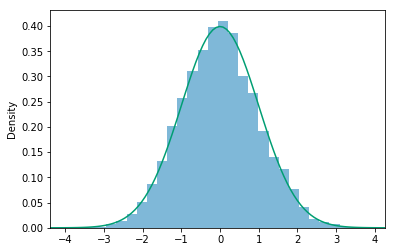

In [11]:
X, I = RV(Normal(0, 1) * BoxModel([-1, 1]))
Y = I * X
Y.sim(10000).plot()
Normal(0, 1).plot()

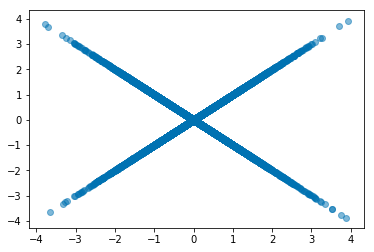

In [12]:
(X & Y).sim(10000).plot()

In [13]:
(X & Y).sim(10000).cov()

-0.013062601596023678

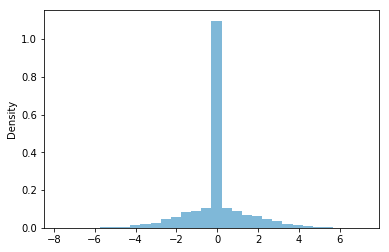

In [14]:
(X + Y).sim(10000).plot()

In [15]:
(X + Y).sim(10000).count_eq(0) / 10000

0.5034

In [16]:
P = GaussianProcessProbabilitySpace(mean_func=lambda t: 0,
                                   cov_func=lambda s, t: 25 * exp(-0.5 * abs(t - s)))
X = RV(P)

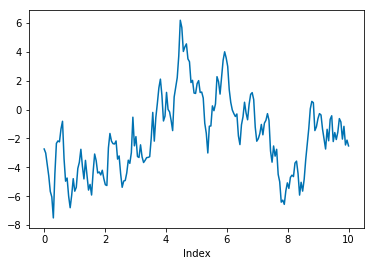

In [17]:
X.sim(1).plot()

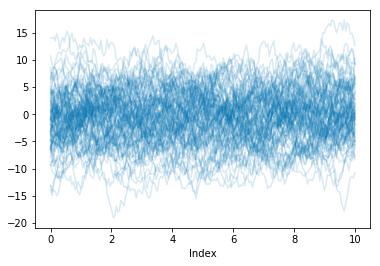

In [18]:
X.sim(100).plot()

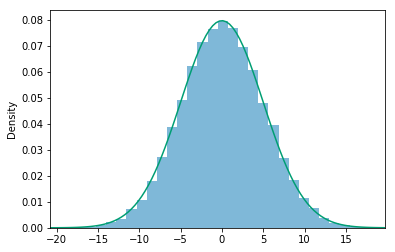

In [19]:
X[1].sim(10000).plot()
Normal(0, var=25).plot()

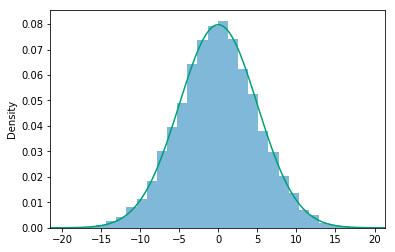

In [20]:
X[1.1].sim(10000).plot()
Normal(0, var=25).plot()

(23.6161976655854, 0.9510663379926092)

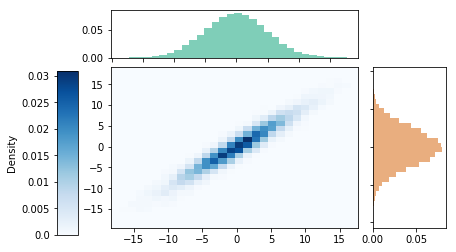

In [21]:
xy = (X[1] & X[1.1]).sim(10000)
xy.plot(['hist', 'marginal'])
xy.cov(), xy.corr()

(23.713071169657898, 0.95052378961173067)

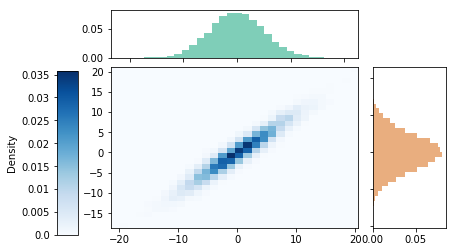

In [22]:
xy = (X[1.8] & X[1.9]).sim(10000)
xy.plot(['hist', 'marginal'])
xy.cov(), xy.corr()

(16.197675007966115, 0.63638335765025966)

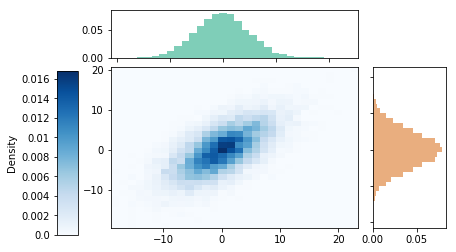

In [23]:
xy = (X[1.0] & X[1.9]).sim(10000)
xy.plot(['hist', 'marginal'])
xy.cov(), xy.corr()

(5.9188908573381864, 0.23524088621302144)

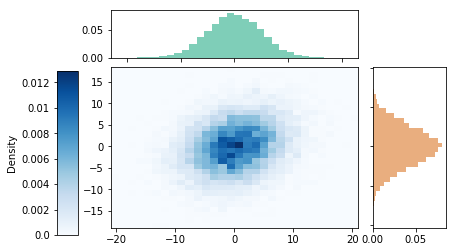

In [24]:
xy = (X[1.0] & X[4.0]).sim(10000)
xy.plot(['hist', 'marginal'])
xy.cov(), xy.corr()

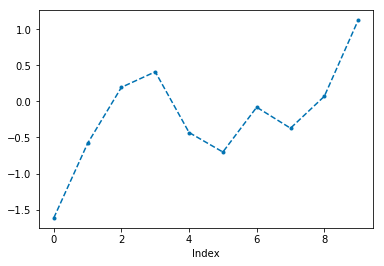

In [25]:
P = Normal(0, 1) ** inf
Z = RV(P)
X = RandomProcess(P)
X[0] = Z[0]
for n in range(100):
    X[n + 1] = 0.5 * X[n] + Z[n + 1]
    
X.sim(1).plot()

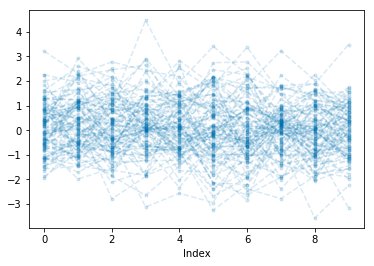

In [26]:
X.sim(100).plot()

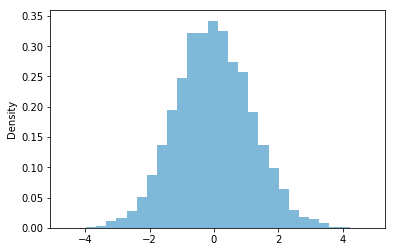

In [27]:
X[3].sim(10000).plot()

(0.67128022915833174, 0.50553955801764583)

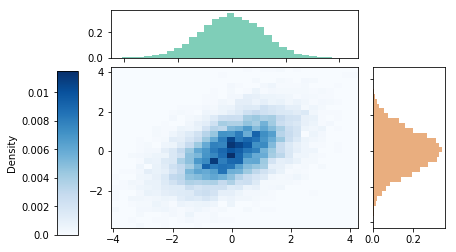

In [28]:
xy = (X[3] & X[4]).sim(10000)
xy.plot(['hist', 'marginal'])
xy.cov(), xy.corr()

(0.32429461838785517, 0.24622612738158262)

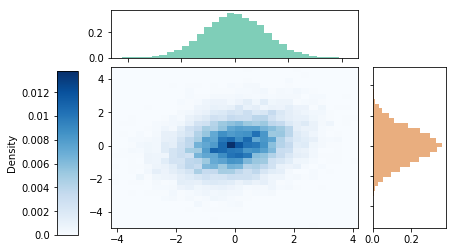

In [29]:
xy = (X[3] & X[5]).sim(10000)
xy.plot(['hist', 'marginal'])
xy.cov(), xy.corr()

(0.18310966225120739, 0.13649931899770953)

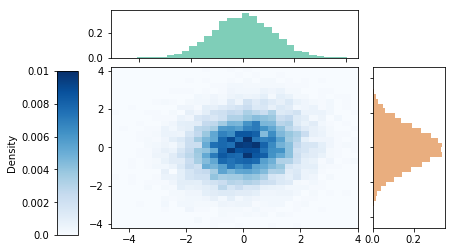

In [30]:
xy = (X[3] & X[6]).sim(10000)
xy.plot(['hist', 'marginal'])
xy.cov(), xy.corr()

# Random walk

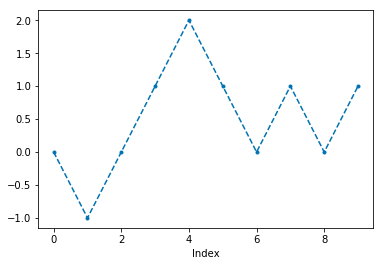

In [31]:
P = BoxModel([-1, 1], size=inf)
Z = RV(P)
X = RandomProcess(P)
X[0] = 0
for n in range(100):
    X[n + 1] = X[n] + Z[n + 1]
    
X.sim(1).plot()

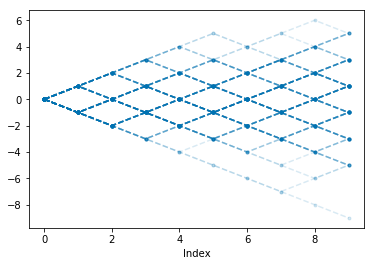

In [32]:
X.sim(100).plot()

(0.0186, 3.9992540400000007)

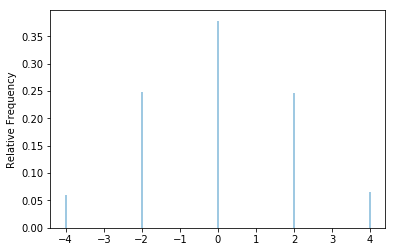

In [33]:
x = X[4].sim(10000)
x.plot()
x.mean(), x.var()

((0.0154, 0.0164),
 (3.96656284, 6.97013104),
 3.9827474400000002,
 0.75745201658701955)

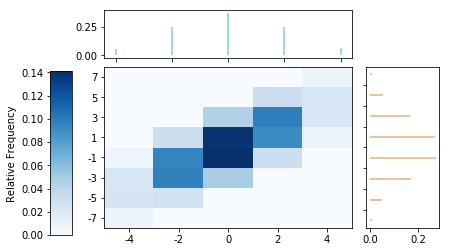

In [34]:
xy = (X[4] & X[7]).sim(10000)
xy.plot(['tile', 'marginal'])
xy.mean(), xy.var(), xy.cov(), xy.corr()

# Brownian Motion

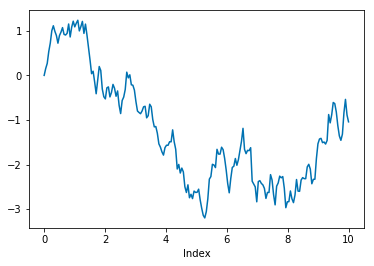

In [35]:
P = BrownianMotionProbabilitySpace(drift=0, scale=1)
W = RV(P)

w = W.sim(1)
w.plot()

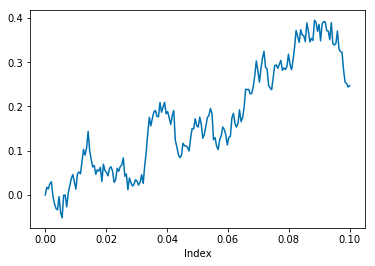

In [36]:
w.plot(tmax=0.1)

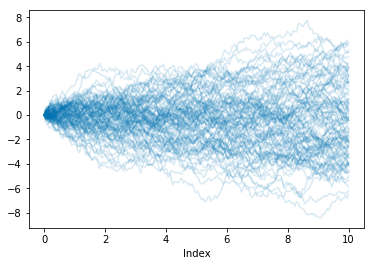

In [37]:
W.sim(100).plot()

(0.008746557658890193, 1.5291841681392695)

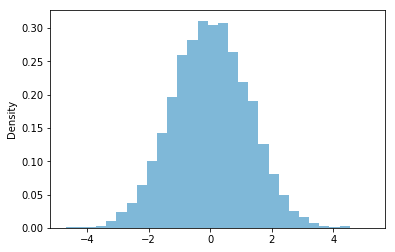

In [38]:
w = W[1.5].sim(10000)
w.plot()
w.mean(), w.var()

((-0.0133826132458, -0.0109416376707),
 (1.51863334675, 2.21947350664),
 1.5246744184500156,
 0.83047328207068238)

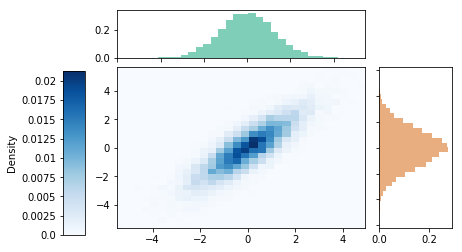

In [39]:
xy = (W[1.5] & W[2.2]).sim(10000)
xy.plot(['hist', 'marginal'])
xy.mean(), xy.var(), xy.cov(), xy.corr()

((0.00455747437757, 0.0119307701803),
 (1.53615536702, 0.705292616649),
 0.010890938544722424,
 0.010463164840806194)

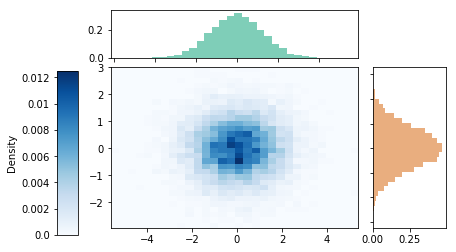

In [40]:
xy = (W[1.5] & (W[2.2] - W[1.5]) ).sim(10000)
xy.plot(['hist', 'marginal'])
xy.mean(), xy.var(), xy.cov(), xy.corr()

# Brownian Motion with drift

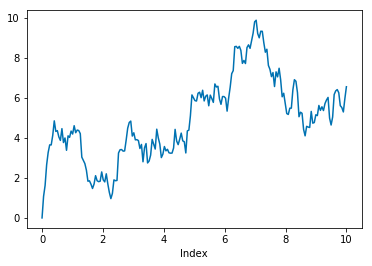

In [2]:
P = BrownianMotionProbabilitySpace(0.1, 2)
B = RV(P)

B.sim(1).plot()

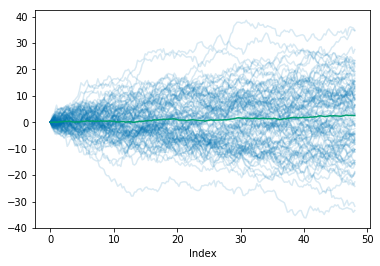

In [5]:
paths = B.sim(100)
paths.plot(tmax=48)
paths.mean().plot(tmax=48)

(0.6353, 4.833476096241484, 13.909167199985541)

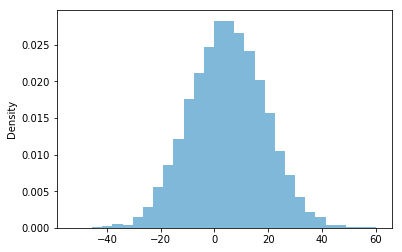

In [9]:
b = B[48].sim(10000)
b.plot()
b.count_gt(0) / 10000, b.mean(), b.sd()

(0.5942, 2.315175781897781, 9.645524585982942)

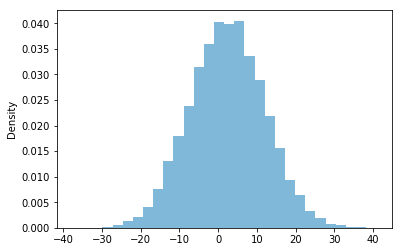

In [10]:
b = (B[48] - B[24]).sim(10000)
b.plot()
b.count_lt(0) / 10000, b.mean(), b.sd()

## Geometric BM

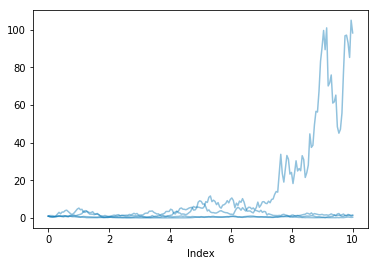

In [16]:
P = BrownianMotionProbabilitySpace(0, 1)
W = RV(P)
Y = exp(W)
Y.sim(4).plot()

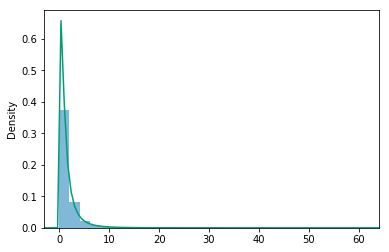

In [19]:
Y[1].sim(10000).plot()
LogNormal(0, 1).plot()

0.4036

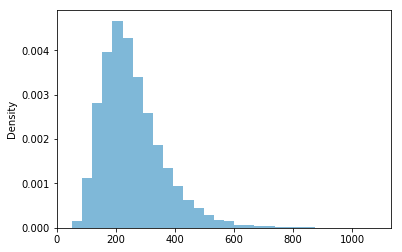

In [24]:
P = BrownianMotionProbabilitySpace(drift=-0.05, scale=0.4)
W = RV(P)
Y = 250 * exp(W)
y = Y[1].sim(10000)
y.plot()
y.count_gt(260) / 10000

## O-U process

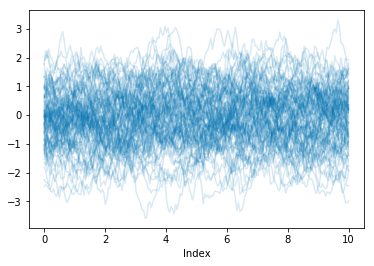

In [14]:
P = BrownianMotionProbabilitySpace(0, 1)
W = RV(P)
t = ContinuousTimeFunction()
U = exp(-t/2) * W[exp(t)]
U.sim(100).plot()

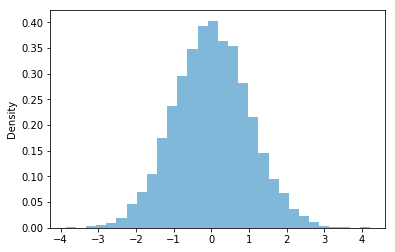

In [13]:
U[3].sim(10000).plot()

((0.000637358006878, -0.00140043342393),
 (0.986335222658, 0.97906588192),
 0.88788362743274085,
 0.90352009935577871)

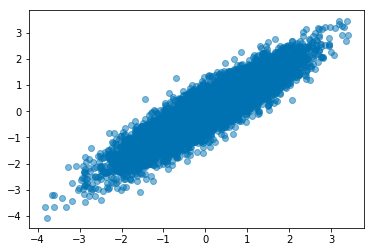

In [21]:
xy = (U[1] & U[1.2]).sim(10000)
xy.plot()
xy.mean(), xy.var(), xy.cov(), xy.corr()

((-0.00622670214289, -0.00631086921111),
 (0.999201773936, 0.992725208896),
 0.58878449987474868,
 0.59117389059438652)

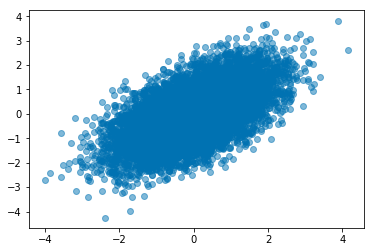

In [20]:
xy = (U[1] & U[2]).sim(10000)
xy.plot()
xy.mean(), xy.var(), xy.cov(), xy.corr()

((-0.000520003050806, 0.0111973802453),
 (0.982645868917, 1.00582980205),
 0.3518477966333301,
 0.35391100686375432)

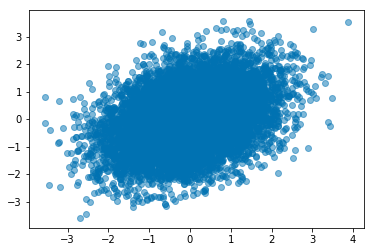

In [22]:
xy = (U[1] & U[3]).sim(10000)
xy.plot()
xy.mean(), xy.var(), xy.cov(), xy.corr()

((0.00322199295908, -0.00292622159388),
 (0.976424126695, 1.00689129094),
 -0.00013282323600159024,
 -0.00013395641419325512)

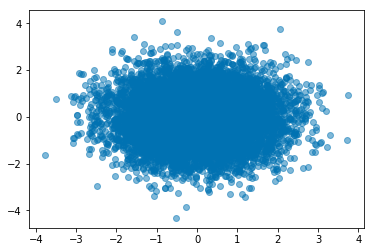

In [23]:
xy = (U[1] & U[10]).sim(10000)
xy.plot()
xy.mean(), xy.var(), xy.cov(), xy.corr()